In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from datautils.analysis import *
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

from statsmodels.api import OLS

from sklearn import metrics
import statsmodels.api as sm

from sklearn.preprcessing import Poynomialalgo #arreglar esto esta mal


In [11]:
# Example importing the CSV here
df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [12]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [16]:
df.describe(include='O') #no hay categorias extrañas, la mayoria son no fumadores 

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [13]:
df.sample(10)

,age,sex,bmi,children,smoker,region,charges
389,24,female,30.210,3,no,northwest,4618.07990
2,28,male,33.000,3,no,southeast,4449.46200
559,19,male,35.530,0,no,northwest,1646.42970
225,55,male,33.880,3,no,southeast,11987.16820
1020,51,male,37.000,0,no,southwest,8798.59300
610,47,female,29.370,1,no,southeast,8547.69130
600,18,female,39.160,0,no,southeast,1633.04440
968,21,male,25.745,2,no,northeast,3279.86855
310,50,male,26.600,0,no,southwest,8444.47400
911,18,male,31.730,0,yes,northeast,33732.68670


In [ ]:
#las vars q tenemos para predecir son edad, sexo, bmi , cildren esto esta en l as instrucciones

In [ ]:
#vamos a hacer regresion lineal, buscamos variables relacionadas entre si, tenemos q elegir q regresor poner
#tenemos q hacer la matriz de correlacion (de person) para ver las variables lineales -> df.corr()

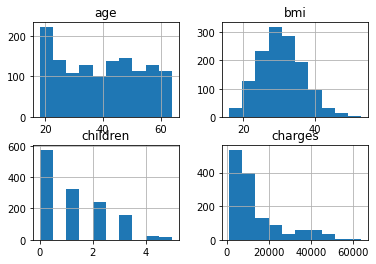

In [17]:
df.hist()
plt.show()

In [22]:
df.duplicated().any() # hay duplicados los tengo q sacar !
#vemos cuales son las vars duplicadas
df[df.duplicated(keep=False)]

#las borramos ?
df_sin_duplicados = df.drop_duplicates()


<AxesSubplot:>

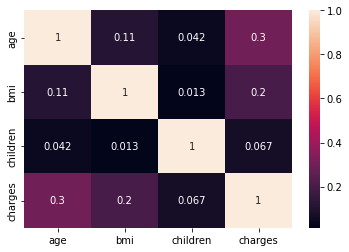

In [23]:
#lo metemos en un mapa de calor a la matriz de correlacion, color claro correlacion alta, no hay correlacion negativa
sns.heatmap(df_sin_duplicados.corr(),annot=True)

In [24]:
df_sin_duplicados=pd.get_dummies(df_sin_duplicados, columns=['sex','smoker','region'], drop_first=True)

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1,0,0
1334,18,31.920,0,2205.98080,0,0,0,0,0
1335,18,36.850,0,1629.83350,0,0,0,1,0
1336,21,25.800,0,2007.94500,0,0,0,0,1


In [35]:
x = df_sin_duplicados.drop('charges',axis=1) #elimina esta columna, el x son todas las columnas menos esta
y = df_sin_duplicados['charges']

In [32]:
#estamos listos para hacer la regresion, tengo q tener esto en los import
#from sklearn.linear_model import LinearRegression
#from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=43)

In [43]:
#entreno el modelo !regresion_lineal = modelo
regresion_lineal = LinearRegression() #esto lo mando con los datos por default, solo cargo el modelo
regresion_lineal.fit(x_train,y_test) #le paso los datos q saque para entrenar 

print('Intercept : ',regresion_lineal.intercept_) #impromo los datos intercept
print('Variables : ',x_train.columns)
print('Coeficient : ',regresion_lineal.coef_)


ValueError: could not convert string to float: 'female'

In [41]:
#ahora imprimimos los errores
modelo2 = sm.OLS(y_train,x_train)
results = modelo2.fit()
results.summary()

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [ ]:
xint = sm.add_constant(x_train)

In [45]:
#ahora hacemos predicciones con el modelo q tengamos ganas
#modelo = regresion_lineal, yo use este nombre de variable no segui a la clase y se me rompio todo, revisar con la libreta q pasen
y_pred = modelo.predict(x_test)
print('MAE:',metrics.mean_absolute_error(y_test, y_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_pred))
print('MRSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

#print('RMSE', metrics.mean_squared_error(y_test, y_pred,squared=False)) otra forma de calcular

NameError: name 'modelo' is not defined

In [ ]:
#hora vemos si con algun hierparametro podemos corregir esto
modelo3 = sm.OLS(y_train. x_train)
#tratar de ubicar la libreta del compra porq me perdi

#el mejor modelo es el q de menos error !!!

In [ ]:
#aca va un viaje de cosas mirar lo q hicieron!

In [ ]:
poly_feature = PolynomialFeatures(degree=2) #transporfmo las vars a polinomicas
x_poly_train = poly_feature.fit_transform(x_train) #van todas al cuadrado, mas la interaccion, va a ver muchos coeficiente
x_poly_test = poly_feature.fit_transform(x_test)

#model es la regresion lineal
modelo5 = modelo.fit(x_poly_train,y_train)



In [ ]:
y_pred_poly = modelo5.predict(x_poly_test)
#meto los prints de MAE MSE RMSE

In [ ]:
#arreglar y entregar !